In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


In [16]:
# Signals parameters

signalLength = int(1.5*dictionary.getAtomsLength())
print('The signals will have a length of {}'.format(signalLength))
snrLevels = [-5, 0, 5, 10, 15]
sparsityLevels = [3, 4, 5, 6, 7]
batchSize = 200

The signals will have a length of 738


[{'x': 8, 'b': 0.02, 'y': 0.014, 's': 1.9224997624588253e-05}, {'x': 16, 'b': 0.045, 'y': 0.026000000000000002, 's': 4.98720885315675e-05}, {'x': 188, 'b': 0.02, 'y': 0.02, 's': 3.192320770719775e-05}, {'x': 100, 'b': 0.01, 'y': 0.026000000000000002, 's': 6.652987883736513e-05}, {'x': 179, 'b': 0.025, 'y': 0.034, 's': 7.313523265236272e-05}, {'x': 157, 'b': 0.030000000000000002, 'y': 0.022, 's': 3.7654511142940185e-05}, {'x': 89, 'b': 0.055, 'y': 0.024, 's': 4.556146388937286e-05}]


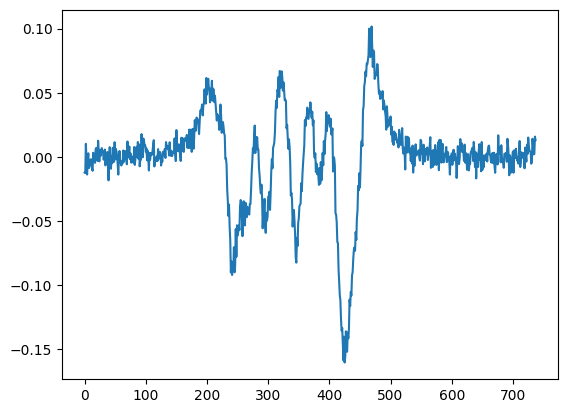

In [15]:
signal, infos = dictionary.generateTestSignal(signal_length=signalLength, sparsity_level=7, snr_level=15)
print(infos)
plt.plot(signal)
plt.show()

In [4]:
#json_filename = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\d_signals_{batchSize}.json'
json_filename = f'/home/gomes/synthetic-data/db_signals_{batchSize}.json'

dictionary.generateSignalsDB(batchSize, signalLength, sparsityLevels, snrLevels, json_filename)